In [2]:
import pandas 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
trainfile = pandas.read_csv(r'/Users/manick/Python Training/dataset/train.csv',encoding='iso-8859-1')
trainfile.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
import sys
sys.path.append(r'/Users/manick/Python Training/CustomPackages')
import udp_draw_decision_tree as ddt

In [4]:
catg_df=pd.get_dummies(trainfile.loc[:,['Sex']],drop_first=True)
catg_df
modfile = pd.concat([trainfile,catg_df],axis=1)
modfile.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [5]:
x = modfile.loc[:,['Sex_male','Pclass']]
y = modfile['Survived']

from sklearn.model_selection import train_test_split 
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=.25,random_state=1234,stratify=y)


In [6]:
dtmod = DecisionTreeClassifier(min_impurity_decrease=.1)
dtmod.fit(train_x,train_y)
predTrain = dtmod.predict(train_x)
pd.crosstab(train_y,predTrain)

col_0,0,1
Survived,,
0,349,63
1,80,176


In [7]:
dtmod = DecisionTreeClassifier(min_impurity_decrease=.1)
dtmod.fit(test_x,test_y)
predTest = dtmod.predict(test_x)
pd.crosstab(test_y,predTest)

col_0,0,1
Survived,,
0,119,18
1,29,57


In [8]:
import pandas 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
testfile = pandas.read_csv(r'/Users/manick/Python Training/dataset/test.csv',encoding='iso-8859-1')
testfile.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
catg_df=pd.get_dummies(testfile.loc[:,['Sex']],drop_first=True)
#catg_df
modfile1 = pd.concat([testfile,catg_df],axis=1)
pred_x = modfile1.loc[:,['Sex_male','Pclass']]
predFinal = dtmod.predict(pred_x)

In [10]:
outdf = pd.DataFrame()
outdf['PassengerId'] = testfile ['PassengerId']
outdf['Survived'] = predFinal
outdf.to_csv('Titanic Predictions.csv',index=None)
outdf.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [11]:
from sklearn.ensemble import RandomForestClassifier


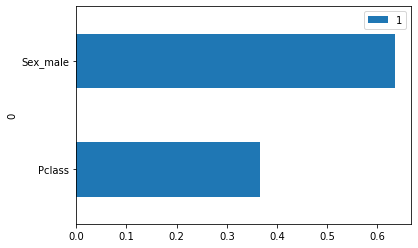

In [12]:
rfmod=RandomForestClassifier (n_estimators=100,
min_impurity_decrease=0.01,
random_state=1234)
rfmod.fit(train_x,train_y)
predTrain - rfmod.predict(train_x)
#calculate_classification_metrics(train_y,predTrain)

predTest - rfmod.predict(test_x)
#calculate_classification_metrics(test_y,predTrain)

varimp=pd.DataFrame([train_x.columns,rfmod.feature_importances_]).T
varimp=varimp.sort_values(by=1,ascending=True)

%matplotlib inline
varimp.plot.barh(x=0,y=1) #0 and 1 is the cloumn heading

In [13]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
train = xgb.DMatrix(train_x,label=train_y)

/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [14]:
#xgbmod = xgb.XGBClassifier(missing=9999999999,max_depth =7, 
#                          n_estimators=77,
#                          learing_rate=.0.01,
#                          seed=1301)
#cvresult=xgb.cv(xgb.get_xgb_parms(),\
#               train,\
#               num_boost__round=300,\
#               nfold=5\
#               metrics=['logloss'],early_stopping_rounds=100,\
#              stratified=True,
#               seed=1301)
#xgbmod.fit(train_x,train_y)
#predTrain=xgbmod.predict(train_x)